In [1]:
import math
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
original_points = [
    [-3.0, -1.0, 1.0],
    [3.0, -1.0, 1.0],
    [1.0, 1.0, 1.0],
    [-1.0, 1.0, 1.0]
]

projected_points = [
    [-2.0, -1.0, 1.0],
    [2.0, -1.0, 1.0],
    [2.0, 1.0, 1.0],
    [-2.0, 1.0, 1.0]
]

In [3]:
def visualize_naive_algorithm(original_points, projected_points):
    xs = [x[0] for x in original_points]
    ys = [y[1] for y in original_points]
    
    xs.append(original_points[0][0])
    ys.append(original_points[0][1])
    
    xs_p = [x[0] for x in projected_points]
    ys_p = [y[1] for y in projected_points]
    
    xs_p.append(projected_points[0][0])
    ys_p.append(projected_points[0][1])
    
    figure = plt.subplots(1, 2, figsize= (20, 9))
    plt.subplot(1, 2, 1)
    plt.title('Original points')
    plt.plot(xs, ys, 'red')
    
    plt.subplot(1, 2, 2)
    plt.title('Projected points')
    plt.plot(xs_p, ys_p, 'blue')
    plt.show()

### Naive algorithm

In [4]:
def get_projection_matrix(points):
    matrix = points[0:3][0:3]
    D = points[3][:]
    
    multipliers = np.dot(D, np.linalg.inv(matrix))
    P = np.eye(3)
    for i in range(3):
        for j in range(3):
            P[i][j] = matrix[i][j] * multipliers[i]
    
    return np.transpose(P)

In [5]:
def naive_algorithm(original_points, projected_points):
    P1 = get_projection_matrix(original_points)
    P2 = get_projection_matrix(projected_points)
    
    return np.dot(P2, np.linalg.inv(P1))

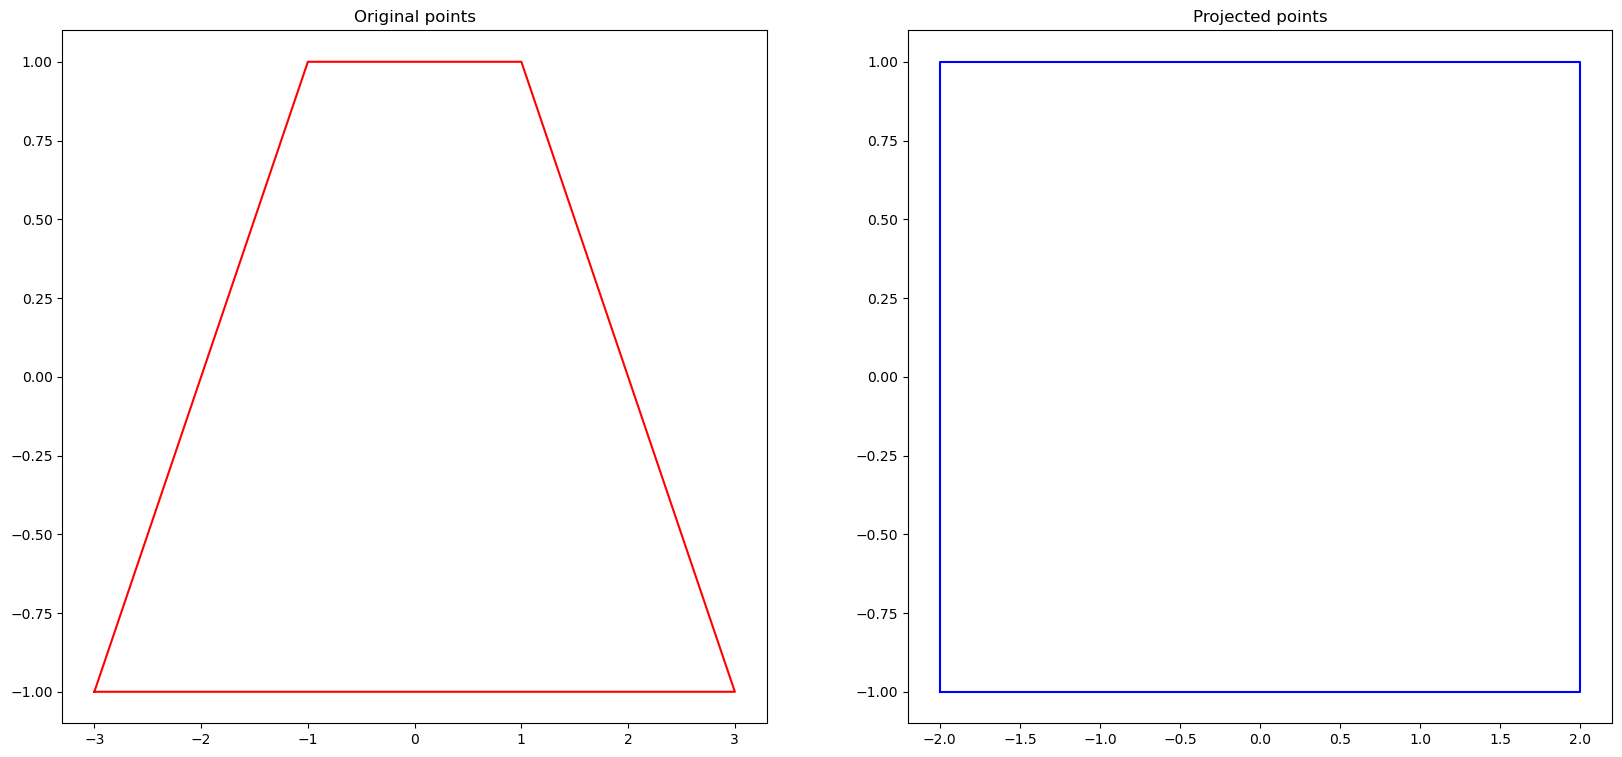

In [6]:
visualize_naive_algorithm(original_points, projected_points)

In [7]:
P_naive = naive_algorithm(original_points, projected_points)
print(f'Projection matrix calculated using naive algorithm: \n{P_naive}')

Projection matrix calculated using naive algorithm: 
[[ 2.  0.  0.]
 [ 0.  2. -1.]
 [ 0. -1.  2.]]


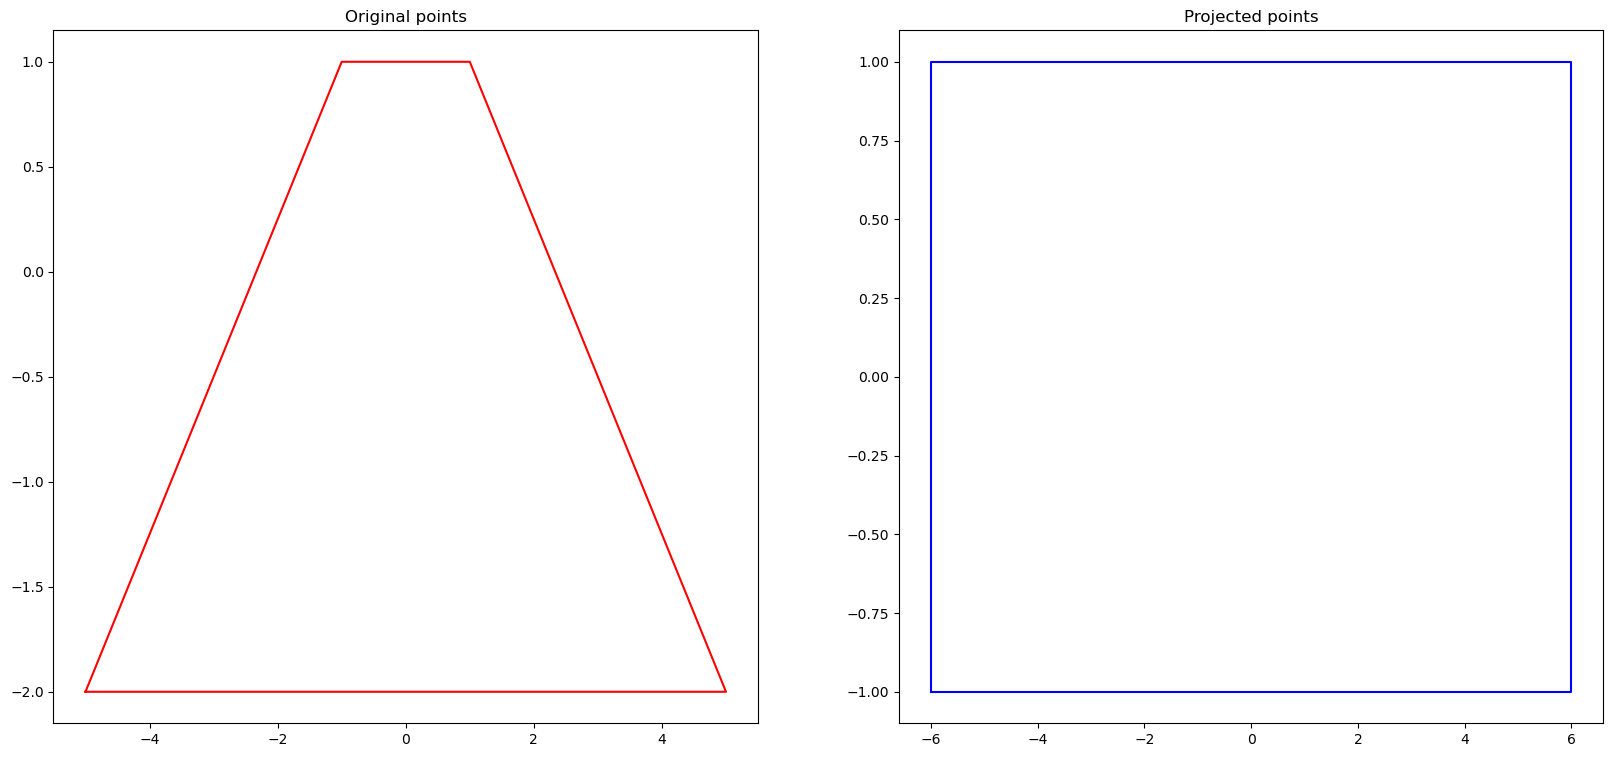

Projection matrix calculated using naive algorithm: 
[[ 6.       0.      -0.     ]
 [ 0.       2.      -1.     ]
 [-0.      -1.33333  2.33333]]


In [8]:
my_original_points = [
    [-5.0, -2.0, 1.0],
    [5.0, -2.0, 1.0],
    [1.0, 1.0, 1.0],
    [-1.0, 1.0, 1.0]
]

my_projected_points = [
    [-6.0, -1.0, 1.0],
    [6.0, -1.0, 1.0],
    [6.0, 1.0, 1.0],
    [-6.0, 1.0, 1.0]
]

visualize_naive_algorithm(my_original_points, my_projected_points)
P_naive_m = naive_algorithm(my_original_points, my_projected_points)
print(f'Projection matrix calculated using naive algorithm: \n{P_naive_m.round(5)}')

### DLT algorithm

In [9]:
def calculate_matrix_for_DLT(original_points, projected_points):
    matrix = []
    
    for i in range(len(original_points)):
        matrix.append([
            0.0, 0.0, 0.0, 
            -projected_points[i][2] * original_points[i][0], -projected_points[i][2] * original_points[i][1], -projected_points[i][2] * original_points[i][2],
            projected_points[i][1] * original_points[i][0], projected_points[i][1] * original_points[i][1], projected_points[i][1] * original_points[i][2]
        ])
        
        matrix.append([
            projected_points[i][2] * original_points[i][0], projected_points[i][2] * original_points[i][1], projected_points[i][2] * original_points[i][2],
            0.0, 0.0, 0.0,
            -projected_points[i][0] * original_points[i][0], -projected_points[i][0] * original_points[i][1], -projected_points[i][0] * original_points[i][2]
        ])
    
    return matrix

In [10]:
def DLT_algorithm(original_points, projected_points):
    A = calculate_matrix_for_DLT(original_points, projected_points)
    _, _, V = np.linalg.svd(A, full_matrices= True)
    
    return V[-1].reshape(3, 3)

In [11]:
P_DLT = DLT_algorithm(original_points, projected_points)
print('Projection matrix calculated using DLT algorithm: ')
print(P_DLT.round(5))

Projection matrix calculated using DLT algorithm: 
[[ 0.53452  0.      -0.     ]
 [ 0.       0.53452 -0.26726]
 [-0.      -0.26726  0.53452]]


In [12]:
P_DLT_m = DLT_algorithm(my_original_points, my_projected_points)
print('Projection matrix calculated using DLT algorithm: ')
print(P_DLT_m.round(5))

Projection matrix calculated using DLT algorithm: 
[[ 0.86403  0.      -0.     ]
 [-0.       0.28801 -0.144  ]
 [-0.      -0.19201  0.33601]]


### Comparison of naive agorithm and DLT

In [13]:
def compare_matrices(P, Q):
    Q_norm = (Q / Q[0][0]) * P[0][0]
    
    return P.round(5) == Q_norm.round(5)

In [14]:
compare_matrices(P_naive, P_DLT)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [15]:
compare_matrices(P_naive_m, P_DLT_m)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Modified DLT algorithm

In [16]:
def homogeneous(point):
    return [point[0] / point[2], point[1] / point[2], 1]

In [17]:
def translate_points(points, xs, ys):
    return [
        [p[0] - xs, p[1] - ys]
        for p in points
    ]

In [18]:
def calculate_r(points):
    return (sum([
        math.sqrt(point[0] ** 2 + point[1] ** 2)
        for point in points
    ]) )/ len(points)

In [19]:
def normalize(points):
    xs = sum([p[0] for p in points]) / len(points)
    ys = sum([p[1] for p in points]) / len(points)

    translated_points = translate_points(points, xs, ys)
    r = calculate_r(translated_points)
    
    scale_factor = float(math.sqrt(2) / r)
    T = [
        [scale_factor, 0, -scale_factor * xs],
        [0, scale_factor, -scale_factor * ys],
        [0, 0,            1                 ]
    ]
    
    return T

In [20]:
def modified_DLT(original_points, projected_points):
    
    # normalization matrices
    T = normalize(original_points)
    T_prim = normalize(projected_points)
    
    # apply matrices to points
    M = np.dot(T, np.transpose(original_points)).transpose()
    M_prim = np.dot(T_prim, np.transpose(projected_points)).transpose()
    
    P_prim = DLT_algorithm(M, M_prim)
    
    return (np.linalg.inv(T_prim)).dot(P_prim).dot(T)

In [21]:
P_DLT_modified = modified_DLT(original_points, projected_points)
print(f'Projection matrix calculated using modified(normalized) DLT:\n{P_DLT_modified.round(5)}')

Projection matrix calculated using modified(normalized) DLT:
[[ 0.50972  0.      -0.     ]
 [ 0.       0.50972 -0.25486]
 [-0.      -0.25486  0.50972]]


In [22]:
P_DLT_modified_m = modified_DLT(my_original_points, my_projected_points)
print(f'Projection matrix calculated using modified(normalized) DLT:\n{P_DLT_modified.round(5)}')

Projection matrix calculated using modified(normalized) DLT:
[[ 0.50972  0.      -0.     ]
 [ 0.       0.50972 -0.25486]
 [-0.      -0.25486  0.50972]]


### Comparison of modified DLT and DLT algorithm

In [23]:
compare_matrices(P_DLT, P_DLT_modified)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [24]:
compare_matrices(P_DLT_m, P_DLT_modified_m)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [25]:
def compare_DLT_matrices():
    C1 = [
        [0, 1, 2],
        [-1, 0, 3],
        [0, 0, 1]
    ]
    
    C2 = [
        [1, -1, 5],
        [1, 1, -2],
        [0, 0, 1]
    ]
    
    new_original_points  = []
    new_projected_points = []
    
    for i in range(len(original_points)):
        new_original_points.append(np.dot(C1, original_points[i]))
        new_projected_points.append(np.dot(C2, projected_points[i]))
    
    P_DLT = DLT_algorithm(original_points, projected_points)
    P_DLT_new = DLT_algorithm(new_original_points, new_projected_points)
    
    P = np.dot(np.linalg.inv(C2), P_DLT_new).dot(C1)
    P = (P_DLT[0] / P) * P 
    
    print(f'Comparison of DLT algorithm with changed coordinates: ')
    print(P_DLT.round(5) == P.round(5))
    
    P_DLT_modified = modified_DLT(original_points, projected_points)
    P_DLT_modified_new = modified_DLT(new_original_points, new_projected_points)
    
    P = np.dot(np.linalg.inv(C2), P_DLT_modified_new).dot(C1)
    print(f'Comparison of modified DLT algorithm with changed coordinates: ')
    print(P_DLT_modified.round(5) == P.round(5))

In [26]:
compare_DLT_matrices()

Comparison of DLT algorithm with changed coordinates: 
[[ True  True  True]
 [False False False]
 [False False False]]
Comparison of modified DLT algorithm with changed coordinates: 
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


### DLT with multiple correspondences

In [27]:
original_points = [
    [-3.0, -1.0, 1.0],
    [3.0, -1.0, 1.0],
    [1.0, 1.0, 1.0],
    [-1.0, 1.0, 1.0],
    [1.0, 2.0, 3.0],
    [-8.0, -2.0, 1.0]
]

projected_points = [
    [-2.0, -1.0, 1.0],
    [2.0, -1.0, 1.0],
    [2.0, 1.0, 1.0],
    [-2.0, 1.0, 1.0],
    [2.0, 1.0, 4.0],
    [-16.0, -5.0, 4.0]
]

In [28]:
P_DLT = DLT_algorithm(original_points, projected_points)
print('Projection matrix calculated using DLT algorithm: ')
print(P_DLT.round(5))

Projection matrix calculated using DLT algorithm: 
[[-0.53452  0.      -0.     ]
 [ 0.      -0.53452  0.26726]
 [-0.       0.26726 -0.53452]]


In [29]:
P_DLT_modified = modified_DLT(original_points, projected_points)
print('Projection matrix calculated using modified DLT algorithm: ')
print(P_DLT_modified.round(5))

Projection matrix calculated using modified DLT algorithm: 
[[ 0.52036 -0.       0.     ]
 [-0.       0.52036 -0.26018]
 [ 0.      -0.26018  0.52036]]


In [30]:
P_DLT_norm = (P_DLT_modified / P_DLT_modified[0, 0]) * P_DLT[0, 0]

In [31]:
P_DLT.round(5) == P_DLT_norm.round(5)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])